In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [67]:
class Node:
    def __init__(self, data, name =None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        self.name = name
        
class Point:
    def __init__(self,cordinates,name):
        self.x = cordinates[0]
        self.y = cordinates[1]
        self.name = name
           
    def __repr__(self):
        return (f"({self.x}, {self.y})" )

    def __str__(self):
        return (self.name)
    
    def __lt__(self, other): #definimos el menor
        if not isinstance(other, Point):
            raise ValueError("Cannot compare Point with non-Point object")
        return (self.y > other.y or (self.y == other.y and self.x < other.x))
    
    def __eq__(self, other):#definimos la igualdad
        if not isinstance(other, Point):
            return False
        return self.x == other.x and self.y == other.y
    
    def __le__(self, other):
        if not isinstance(other, Point):
            raise ValueError("Cannot compare Point with non-Point object")
        return self.__lt__(other) or self.__eq__(other)
    
    def imprimir_puntos(points): 
        [print(p) for p in points]
    
   
        
    @classmethod
    def generate_random_points(cls,n):
        random_points = []
        for i in range(n):
            x = np.round(np.random.uniform(0, 100),4)
            y = np.round(np.random.uniform(0, 100),4)
            random_points.append(cls((x,y),f'P{i}'))
        return random_points 
     
    @classmethod
    def convertir_lista_points(cls, list_points):
        points = []
        for i, coords in enumerate(list_points):
            p = cls(coords,f'P{i}')
            points.append(p)
        return points
        
        
class Arbol:
    def __init__(self, nodes):
        if isinstance(nodes, (int, float, tuple, Point)):
            if isinstance(nodes, Point):
                nodes = [nodes]  # Convertir el objeto Point en una lista de un solo elemento
            self.root = Node(nodes.pop(0))
            
            while len(nodes) > 0:
                node = Node(nodes.pop(0))
                self._construirArbol(self.root, node)
        elif isinstance(nodes, Node):
            self.root = nodes
        else:
            self.root = Node(nodes.pop(0))
            while len(nodes) > 0:
                node = Node(nodes.pop(0))
                self._construirArbol(self.root, node)
        self.hojas = self._inOrder(self.root)
                
    def _construirArbol(self, root, node):
        if node.data <= root.data:
            if root.left == None: root.left = node
            else: return(self._construirArbol(root.left, node))
                
        else:
            if root.right == None: root.right = node
            else: return(self._construirArbol(root.right, node))
    
    def _inOrder(self, node, result=None):
        if result is None:
            result = []
        if node is not None:
            self.inOrder(node.left, result)
            result.append(node.data)
            self.inOrder(node.right, result)
        return result
        
    
    def preOrder(self, node, result=None):
        if result is None:
            result = []
        if node is not None:
            result.append(node.data)
            self.preOrder(node.left, result)
            self.preOrder(node.right, result)
        return result
    
    
    def inOrder(self, node, result=None):
        if result is None:
            result = []
        if node is not None:
            self.inOrder(node.left, result)
            result.append(node.data)
            self.inOrder(node.right, result)
        return result
    
    def postOrder(self, node, result=None):
        if result is None:
            result = []
        if node is not None:
            self.postOrder(node.left, result)
            self.postOrder(node.right, result)
            result.append(node.data)
            
        return result
    
    def depht(self, node, count = None):
        if node is None:
            return -1
        leftAns = self.depht(node.left)
        rightAns = self.depht(node.right)
        count = max(leftAns, rightAns) + 1
        return count
   
    
    def is_balance(self, node):
        if node is None:
            return True
        dephtLeft = self.depht(node.left)
        dephtRight = self.depht(node.right)
        return abs(dephtLeft - dephtRight) <= 1 and self.is_balance(node.left) and \
                                                    self.is_balance(node.right)

            
    def balanceo(self):
        if not self.is_balance(self.root):
            list_order = self.inOrder(self.root)
            new_root = self._BBT(list_order)
            self.root = new_root
     
    def _BBT(self, sortedArr):
        if not sortedArr:
            return None
        mid = int(len(sortedArr) / 2)
        
        new_node = Node(sortedArr[mid])
        new_node.left = self._BBT(sortedArr[:mid])
        new_node.right = self._BBT(sortedArr[mid + 1:])
        return new_node
    
    
    def insert(self,node):
        if not isinstance(node, Node): node = Node(node)
        self._insert_element(self.root, node)
        if not self.is_balance(self.root):
            self.balanceo()
        self.hojas = self.inOrder(self.root)
            
            
    def _insert_element(self, root, node):
        
        if node.data <= root.data and root.left == None:root.left = node #casos base para la insersion
        elif root.data < node.data and root.right == None:root.right = node
            
        elif node.data <= root.data:return self._insert_element(root.left, node)
        elif root.data < node.data:return self._insert_element(root.right, node)
        
            

## TAREA clase segmentos con visualización de conjunto de segmentos

In [68]:
def visualization(points):
# Extracting x and y coordinates from points
    x = [coor.x for coor in points]
    y = [coor.y for coor in points]

    # Create a figure and axes
    fig, axs = plt.subplots(figsize=(12, 6))

    # Plot the original points using a scatter plot
    axs.scatter(x, y, color='blue')

    # Add x-coordinate labels to the points
    for point in points:
        x_label = point.name
        axs.text(point.x, point.y, x_label, ha='center', va='bottom')


       # Set plot labels and title
    axs.set_xlabel('X Coordinate')
    axs.set_ylabel('Y Coordinate')
    axs.set_title('Point Visualization')

    # Display the plot
    plt.show()


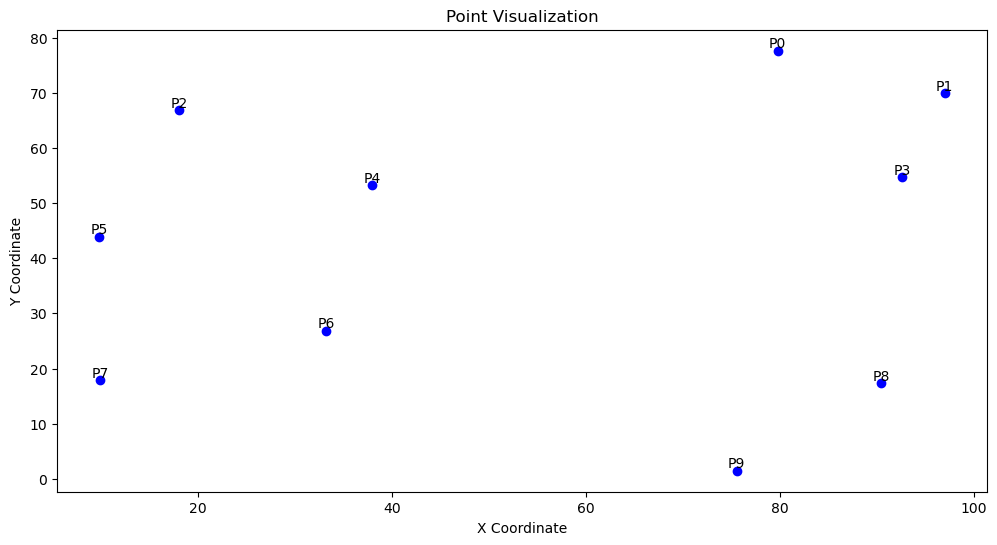

In [69]:
# caso en que me pasan un conjunto de coordenadas en el plano
list_cordinates = [(79.7671, 77.6465), (97.0062, 69.9895), (18.0766, 66.8153),\
                   (92.5981, 54.6942),(37.9695, 53.3007),\
                   (9.8558, 43.8879), (33.2138, 26.8581),\
                   (9.9203, 17.8804), (90.4387, 17.3188), (75.5413, 1.4602)]
points = Point.convertir_lista_points(list_cordinates)
pointsc = points.copy()
arbol = Arbol(pointsc)
arbol.is_balance(arbol.root)
visualization(points)

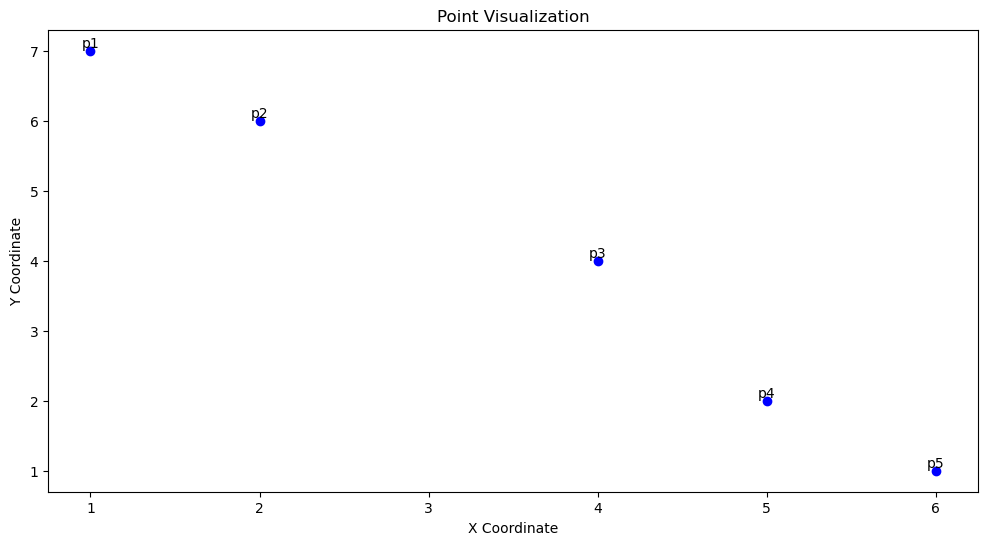

[(6, 1), (5, 2), (4, 4), (2, 6), (1, 7)]


In [57]:
# caso en que creo puntos aleatorios o defino puntos
#points = Point.generate_random_points(10)
p5 = Point((6,1),'p5')
p4 = Point((5,2),'p4')
p3 = Point((4,4),'p3')
p2 = Point((2,6),'p2')
p1 = Point((1,7),'p1')
points = [p5, p4, p3, p2, p1]


pointsc = points.copy()
arbol = Arbol(pointsc)
arbol.is_balance(arbol.root)
visualization(points)
print(points)

In [70]:
arbol.is_balance(arbol.root)

False

In [65]:
Point.imprimir_puntos(arbol.inOrder(arbol.root))

P0
P1
P2
P3
P4
P5
P6
P7
P8
P9


In [71]:
arbol.balanceo()
Point.imprimir_puntos(arbol.preOrder(arbol.root))

P5
P2
P1
P0
P4
P3
P8
P7
P6
P9


In [40]:
# print(arbol.root.data)
# print(arbol.root.left.data)
# print(arbol.root.right.data)
# print(arbol.root.left.left.data)
# print(arbol.root.right.left.data)

In [72]:
arbol.is_balance(arbol.root)

True

In [42]:
p6 = Point((1,9),'p6')
arbol.insert(p6)

In [104]:
Point.imprimir_puntos(arbol.inOrder(arbol.root))


P2
P5
P0
P8
P1
P7
P3
P4
P6
P9


In [105]:
arbol.is_balance(arbol.root)

True

In [22]:
arbol.inOrder(arbol.root)

[(1, 9), (1, 7), (2, 6), (4, 4), (5, 2), (6, 1)]

# preguntar si la insersión y balanceo son correctos